### Modeling DAQUAR
* [Dataset](https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/research/vision-and-language/visual-turing-challenge)

* [Original Paper](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://proceedings.neurips.cc/paper_files/paper/2014/file/d516b13671a4179d9b7b458a6ebdeb92-Paper.pdf)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import process_labels, split_data
from src.classifiers_base import preprocess_df

from transformers import BertTokenizer

from src.multimodal_data_loader import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_base_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'datasets/daquar/'

In [3]:
text_path = os.path.join(PATH, 'labels.csv')
images_path = os.path.join(PATH, 'images')

## Get data

In [4]:
df = pd.read_csv(text_path)
df

question   image_id  \
0      what is on the right side of the black telepho...     image3   
1      what is in front of the white door on the left...     image3   
2                    what is on the desk in the image3 ?     image3   
3      what is the largest brown objects in this imag...     image3   
4      what color is the chair in front of the white ...     image3   
...                                                  ...        ...   
12463  what is found below the chandelier in the imag...  image1448   
12464            what is on the floor in the image1449 ?  image1449   
12465    what are around dining table in the image1449 ?  image1449   
12466  what is at the opposite side of the dining tab...  image1449   
12467  what is behind the wall divider in the image14...  image1449   

                                      answer  split  
0                                       desk  train  
1                                  telephone  train  
2      book, scissor, papers, tape_dispenser  train  
3                                     carton  train  
4                                        red  train  
...                                      ...    ...  
12463                                  table   test  
12464                                    rug   test  
12465                                  chair   test  
12466                        decoration_item   test  
12467                                  table   test  

[12468 rows x 4 columns]

## Data Perparation

In [5]:
# Select features and labels vectors
text_columns = 'question'
image_columns = 'image_id'
label_columns = 'answer'

df = preprocess_df(df, image_columns, images_path)

# Split the data
train_df, test_df = split_data(df)

# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

100%|██████████| 12468/12468 [00:06<00:00, 1889.77it/s]


Train Shape: (6795, 4)
Test Shape: (5673, 4)


In [6]:
train_df

question  \
0     what is on the right side of the black telepho...   
1     what is in front of the white door on the left...   
2                   what is on the desk in the image3 ?   
3     what is the largest brown objects in this imag...   
4     what color is the chair in front of the white ...   
...                                                 ...   
6790      what are stuck on the wall in the image1440 ?   
6791  what is in the top right corner in the image14...   
6792  what is in front of the window in the image1440 ?   
6793  what are the things on the cabinet in the imag...   
6794  what are around the dining table in the image1...   

                                  image_id  \
0        datasets/daquar/images/image3.png   
1        datasets/daquar/images/image3.png   
2        datasets/daquar/images/image3.png   
3        datasets/daquar/images/image3.png   
4        datasets/daquar/images/image3.png   
...                                    ...   
6790  datasets/daquar/images/image1440.png   
6791  datasets/daquar/images/image1440.png   
6792  datasets/daquar/images/image1440.png   
6793  datasets/daquar/images/image1440.png   
6794  datasets/daquar/images/image1440.png   

                                     answer  split  
0                                      desk  train  
1                                 telephone  train  
2     book, scissor, papers, tape_dispenser  train  
3                                    carton  train  
4                                       red  train  
...                                     ...    ...  
6790                                  photo  train  
6791                                 window  train  
6792                                cabinet  train  
6793                       candelabra, book  train  
6794                                  chair  train  

[6795 rows x 4 columns]

In [7]:
# Instantiate tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [8]:
train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

### Models

In [9]:
output_size = len(mlb.classes_)
multilabel = True

Training Early Fusion Model:
The number of parameters of the model are: 261363


STAGE:2023-12-30 23:37:59 118493:118493 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/35 - Test Accuracy: 0.0180
Epoch 1/35 - Training Time: 251.75 seconds | Inference Time: 207.45 seconds
Epoch 2/35 - Test Accuracy: 0.0180
Epoch 2/35 - Training Time: 200.67 seconds | Inference Time: 167.18 seconds
Epoch 3/35 - Test Accuracy: 0.0180
Epoch 3/35 - Training Time: 200.53 seconds | Inference Time: 165.93 seconds
Epoch 4/35 - Test Accuracy: 0.0180
Epoch 4/35 - Training Time: 206.67 seconds | Inference Time: 164.61 seconds
Epoch 5/35 - Test Accuracy: 0.0180
Epoch 5/35 - Training Time: 220.73 seconds | Inference Time: 179.00 seconds
Epoch 6/35 - Test Accuracy: 0.0217
Epoch 6/35 - Training Time: 211.54 seconds | Inference Time: 168.99 seconds
Epoch 7/35 - Test Accuracy: 0.0287
Epoch 7/35 - Training Time: 194.40 seconds | Inference Time: 173.81 seconds
Epoch 8/35 - Test Accuracy: 0.0326
Epoch 8/35 - Training Time: 213.62 seconds | Inference Time: 180.13 seconds
Epoch 9/35 - Test Accuracy: 0.0335
Epoch 9/35 - Training Time: 212.56 seconds | Inference Time: 177.13 seconds
E

STAGE:2023-12-31 03:25:51 118493:118493 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2023-12-31 03:25:53 118493:118493 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                   DataParallel.forward         4.34%      587.191s        99.02%    13396.911s        1.953s          6860  
                                           aten::linear         0.17%       23.586s        64.96%     8788.462s       8.656ms       1015280  
                                            aten::addmm        54.75%     7408.127s        64.58%     8737.664s       8.606ms       1015280  
                                         training_batch         0.15%       20.566s        54.66%     7395.524s        1.975s          3745  
      

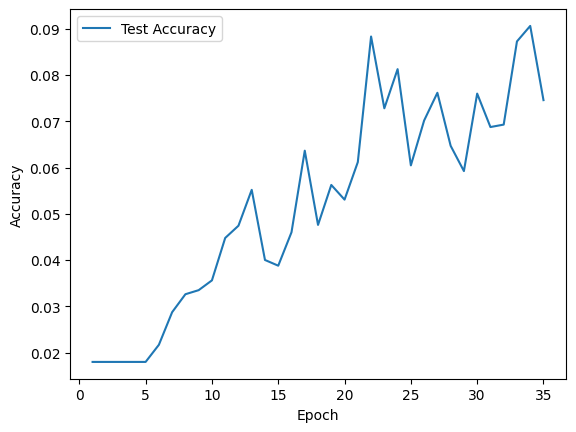

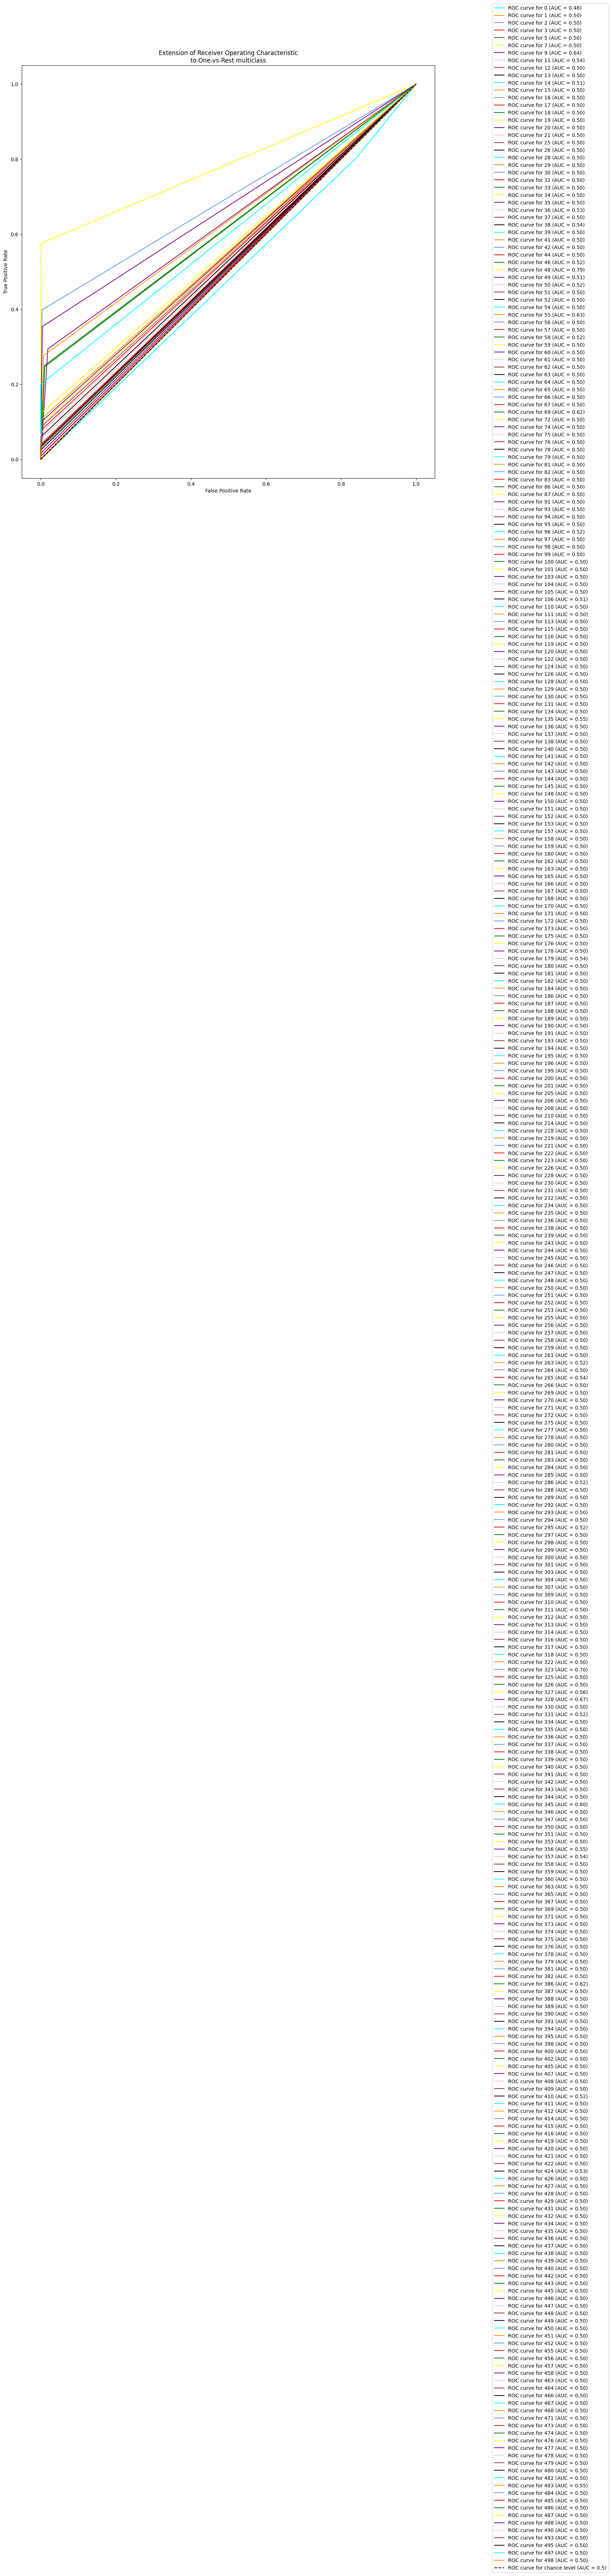

              precision    recall  f1-score   support

           0       0.04      0.80      0.07       217
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.45      0.29      0.35       282
          11       0.21      0.10      0.13       143
          12       0.00      0.00      0.00        94
          13       0.00      0.00      0.00        56
          14       0.14      0.03      0.05        37
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00    

In [10]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, output_size, num_epochs=35, multilabel=multilabel, report=True, lr=0.001, set_weights=False, adam=True)

Training Late Fusion Model:
The number of parameters of the model are: 163059


STAGE:2023-12-31 04:15:03 118493:118493 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/35 - Test Accuracy: 0.0180
Epoch 1/35 - Training Time: 165.27 seconds | Inference Time: 120.91 seconds
Epoch 2/35 - Test Accuracy: 0.0180
Epoch 2/35 - Training Time: 158.92 seconds | Inference Time: 131.57 seconds
Epoch 3/35 - Test Accuracy: 0.0180
Epoch 3/35 - Training Time: 154.74 seconds | Inference Time: 140.16 seconds
Epoch 4/35 - Test Accuracy: 0.0185
Epoch 4/35 - Training Time: 161.27 seconds | Inference Time: 127.47 seconds
Epoch 5/35 - Test Accuracy: 0.0263
Epoch 5/35 - Training Time: 157.29 seconds | Inference Time: 134.97 seconds
Epoch 6/35 - Test Accuracy: 0.0317
Epoch 6/35 - Training Time: 176.07 seconds | Inference Time: 140.76 seconds
Epoch 7/35 - Test Accuracy: 0.0273
Epoch 7/35 - Training Time: 168.39 seconds | Inference Time: 137.82 seconds
Epoch 8/35 - Test Accuracy: 0.0268
Epoch 8/35 - Training Time: 164.17 seconds | Inference Time: 138.62 seconds
Epoch 9/35 - Test Accuracy: 0.0298
Epoch 9/35 - Training Time: 151.43 seconds | Inference Time: 139.65 seconds
E

STAGE:2023-12-31 07:09:51 118493:118493 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2023-12-31 07:09:53 118493:118493 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                   DataParallel.forward         1.72%      177.222s        98.57%    10162.106s        1.481s          6860  
                                           aten::linear         0.22%       22.408s        78.55%     8098.215s       7.923ms       1022140  
                                            aten::addmm        73.99%     7628.392s        78.09%     8050.422s       7.876ms       1022140  
                                         training_batch         0.22%       22.348s        54.12%     5579.264s        1.490s          3745  
      

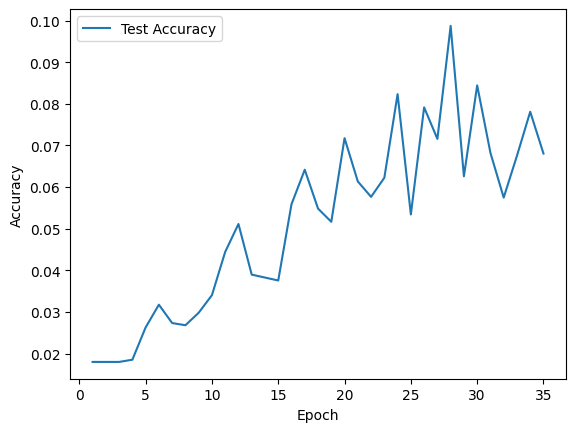

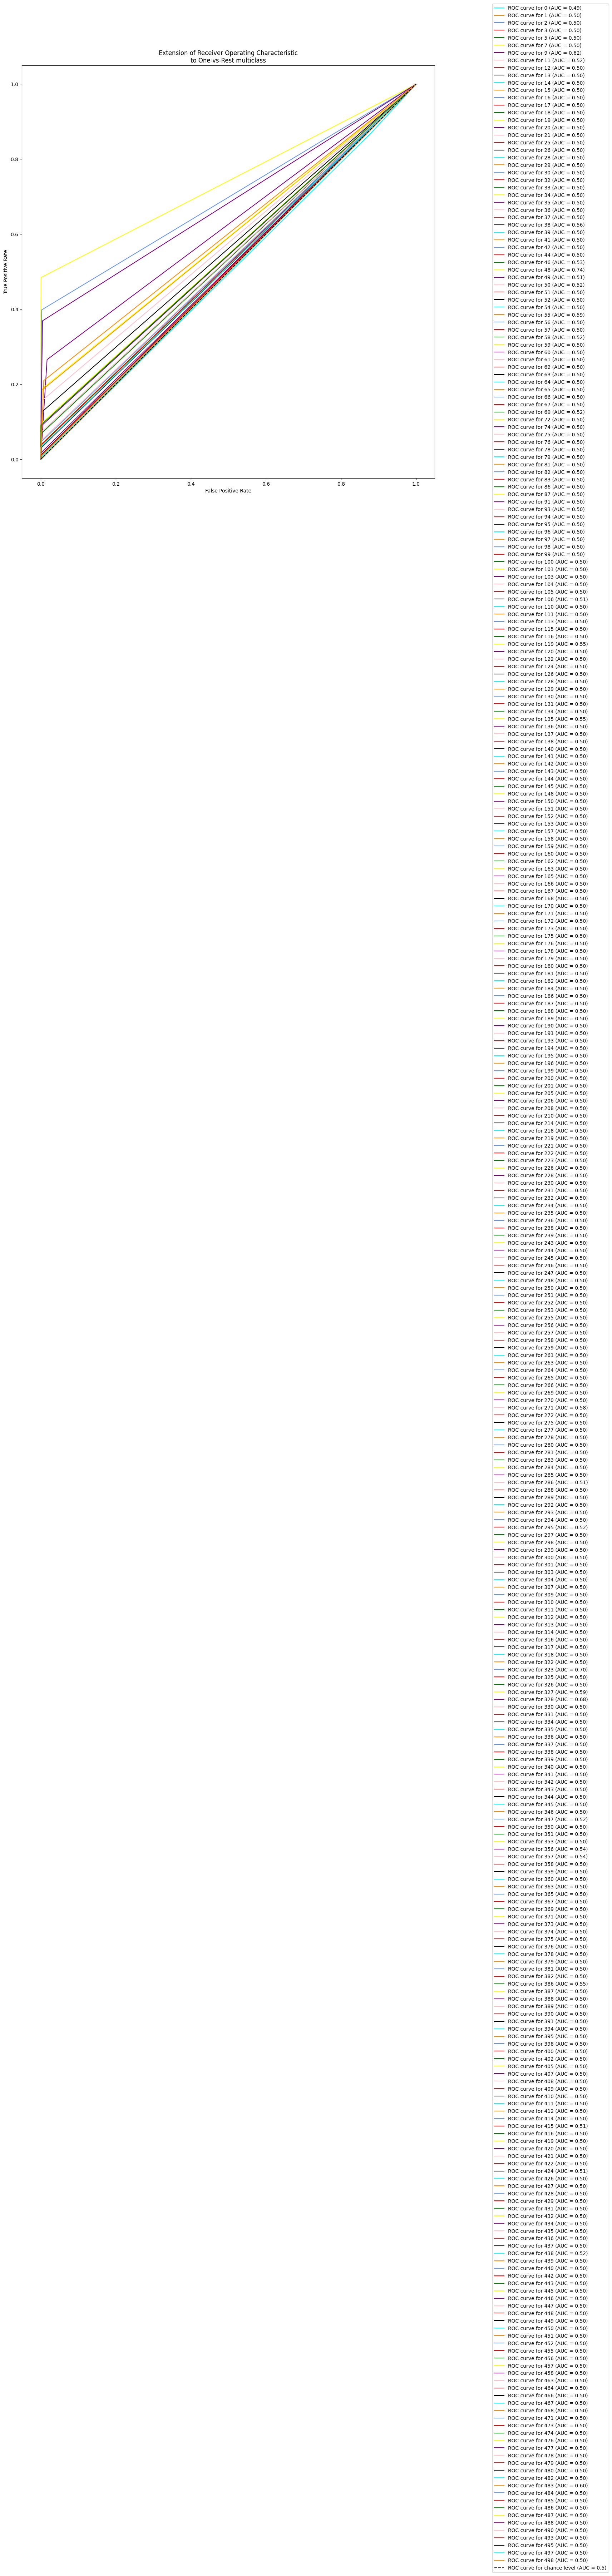

              precision    recall  f1-score   support

           0       0.04      0.87      0.07       217
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.45      0.27      0.33       282
          11       0.19      0.04      0.07       143
          12       0.00      0.00      0.00        94
          13       0.00      0.00      0.00        56
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00    

In [11]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, output_size, num_epochs=35, multilabel=multilabel, report=True, set_weights=False, adam=True)